# Exercise 10: Multivariate models

## Table of Contents

* ANOVA w/o interactions
    * One-way ANOVA
    * Post-hoc testing 
* ANOVA w/ interactions
    * Two-way ANOVA
    
## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as sps
import pingouin as pg
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os

# For retina displays only 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
%matplotlib inline

## Multivariate models w/o interactions

In [2]:
# Creating some fake data
n = 20

X1 = np.random.normal(loc=.5, scale=2, size=n)
X2 = np.random.normal(loc=2, scale=2, size=n)
X3 = np.random.normal(loc=0, scale=2, size=n)

In [3]:
# Reorganizing data in dataframe for statsmodels
df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3})
df_m = df.melt(value_vars=['X1', 'X2', 'X3'], var_name='Group', value_name='X')
df_m

,Group,X
0,X1,-1.961865
1,X1,-2.931317
2,X1,1.076586
3,X1,-0.145858
4,X1,2.221908
5,X1,-3.338048
6,X1,-2.707709
7,X1,-1.552299
8,X1,0.391480
9,X1,-1.498107


### One-way ANOVA

In [4]:
# Using scipy.stats 
sps.f_oneway(X1, X2, X3)

F_onewayResult(statistic=8.656182791501685, pvalue=0.0005214256894645705)

In [5]:
# Using statsmodels, "C()" indicates it is a categorical variable

model = smf.ols('X ~ C(Group)', data=df_m).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Group),2.0,84.019291,42.009645,8.656183,0.000521
Residual,57.0,276.628838,4.853138,NaN,NaN


### Post-hoc testing 

In [6]:
# Using t-tests with bonferroni correction 

results = model.t_test_pairwise('C(Group)', method='bonferroni')
results.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-bonferroni,reject-bonferroni
X2-X1,2.350205,0.696645,3.373607,0.001339,0.955198,3.745212,0.004018,True
X3-X1,-0.294200,0.696645,-0.422310,0.674388,-1.689207,1.100807,1.000000,False
X3-X2,-2.644405,0.696645,-3.795916,0.000359,-4.039412,-1.249398,0.001076,True


In [7]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [93]:
pairwise_tukeyhsd(df_m['X'], df_m['Group'], alpha=0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
X1,X2,2.297,0.0043,0.6381,3.956,True
X1,X3,0.4738,0.7524,-1.1851,2.1328,False
X2,X3,-1.8232,0.028,-3.4822,-0.1643,True


## Multivariate models w/ interactions

## Two-way ANOVA

In [129]:
# Creating some fake data with no interaction
n = 15

age_w_s = np.random.normal(loc=0, scale=2, size=n)
age_w_l = np.random.normal(loc=2, scale=2, size=n)
age_m_s = np.random.normal(loc=.5, scale=2, size=n)
age_m_l = np.random.normal(loc=2.5, scale=2, size=n)
age = np.concatenate([age_w_s, age_w_l, age_m_s, age_m_l])

typ = np.repeat(["wild-type", "wild-type", "mutant", "mutant"], repeats=[len(age_w_s), len(age_w_l), len(age_m_s), len(age_m_l)])
size = np.repeat(["small", "large", "small", "large"], repeats=[len(age_w_s), len(age_w_l), len(age_m_s), len(age_m_l)])
df_2 = pd.DataFrame({'type': typ, 'size': size, 'age': age})
df_2

,type,size,age
0,wild-type,small,-0.209195
1,wild-type,small,-0.780501
2,wild-type,small,0.447441
3,wild-type,small,2.207825
4,wild-type,small,-0.624387
5,wild-type,small,-1.038629
6,wild-type,small,-0.578531
7,wild-type,small,0.160510
8,wild-type,small,0.724502
9,wild-type,small,0.299897


<AxesSubplot:title={'center':'age'}, xlabel='[type, size]'>

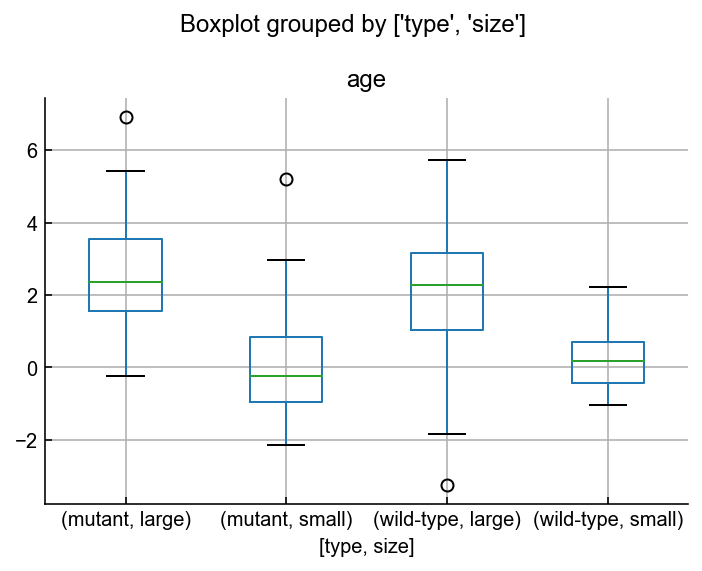

In [130]:
# Plotting the data
df_2.boxplot(by=['type', 'size'], figsize=(5,4))

In [131]:
two_way_result = smf.ols('age ~ C(type) + C(size)', data=df_2).fit()
sm.stats.anova_lm(two_way_result)

,df,sum_sq,mean_sq,F,PR(>F)
C(type),1.0,1.099638,1.099638,0.306965,0.581716
C(size),1.0,66.822004,66.822004,18.653416,0.000063
Residual,57.0,204.190711,3.582293,NaN,NaN


In [132]:
two_way_result = smf.ols('age ~ C(type) + C(size) + C(type):C(size)', data=df_2).fit()
sm.stats.anova_lm(two_way_result)

,df,sum_sq,mean_sq,F,PR(>F)
C(type),1.0,1.099638,1.099638,0.305087,0.582909
C(size),1.0,66.822004,66.822004,18.539284,0.000068
C(type):C(size),1.0,2.347306,2.347306,0.651243,0.423083
Residual,56.0,201.843406,3.604347,NaN,NaN


In [ ]:
# Exercise: Generate data with an interaction effect 





